In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


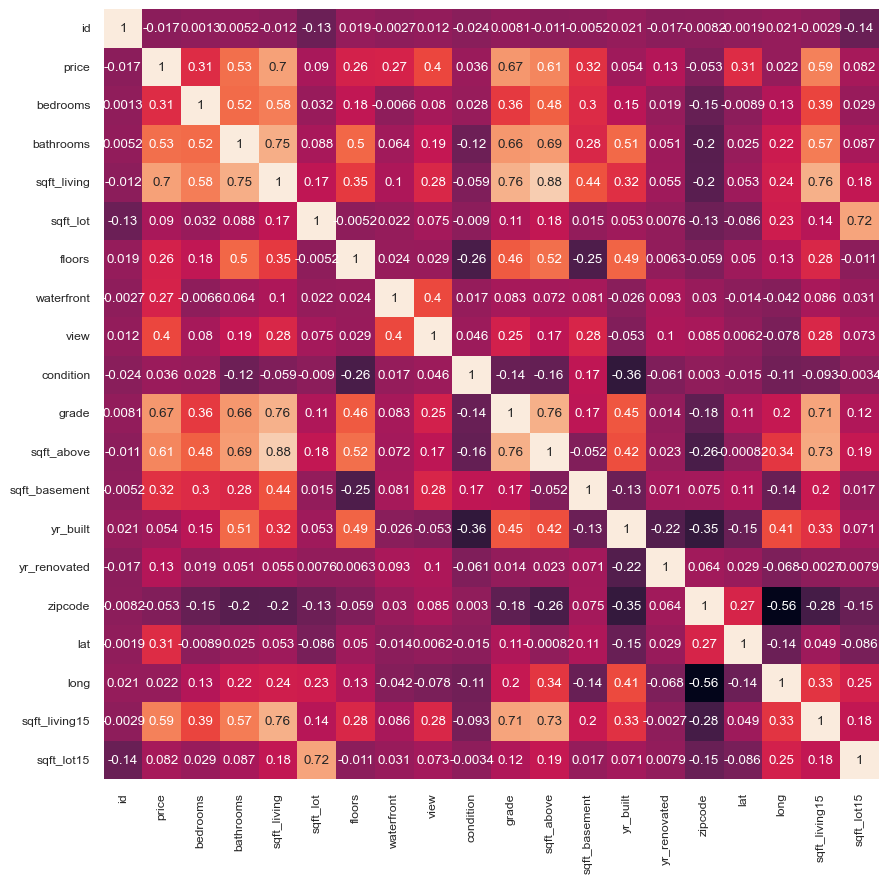

In [3]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

# 숫자형 열만 선택
df_numeric = df.select_dtypes(include=['number'])

# 상관 관계 행렬
df_corr = df_numeric.corr()

# 히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)


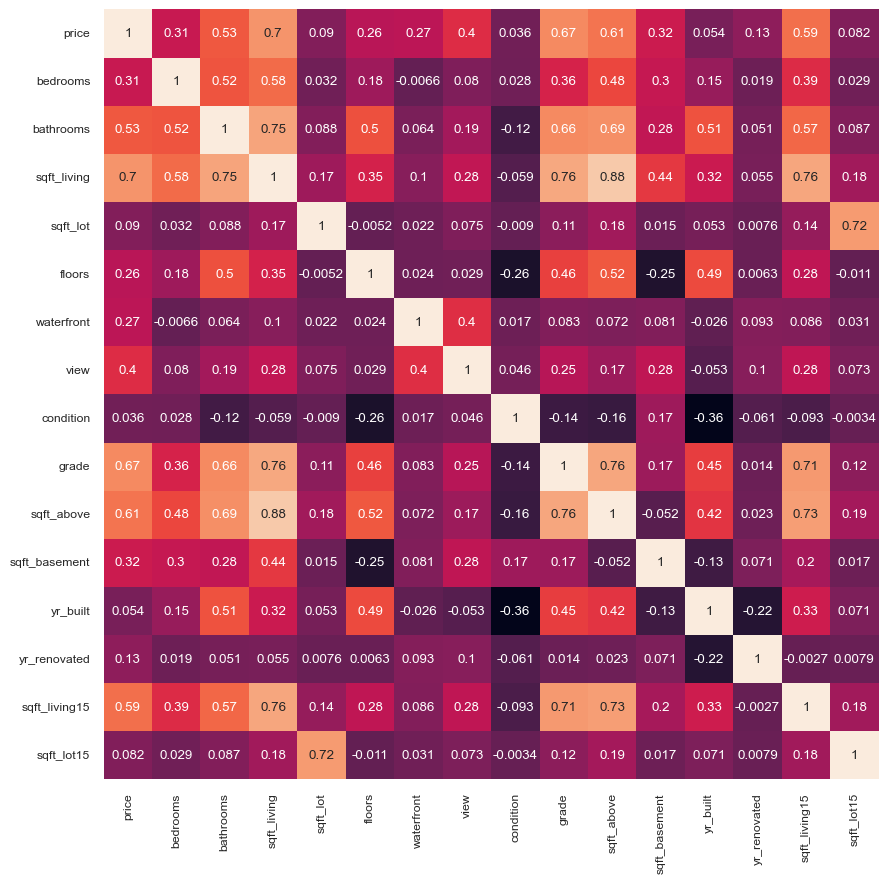

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

# 숫자형 열만 선택
df_numeric = df.select_dtypes(include=['number'])

# 상관 관계 행렬
df_corr = df_numeric.corr()

# 히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [8]:
X = df.drop('price',axis=1)

In [10]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [11]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [13]:
X = X.values

In [14]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 0.000e+00, 1.340e+03,
        5.650e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 1.991e+03, 1.690e+03,
        7.639e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 0.000e+00, 2.720e+03,
        8.062e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        2.007e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 0.000e+00, 1.410e+03,
        1.287e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        1.357e+03]])

In [15]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((17290, 15), (17290, 1), (4323, 15), (4323, 1))

In [36]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(15,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

model.summary()

/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,737 (143.50 KB)

 Trainable params: 36,737 (143.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test),
    callbacks=[early_stopping])
y_pred = model.predict(X_test)

Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 23.1159 - mae: 0.5468 - val_loss: 0.0023 - val_mae: 0.0319
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0024 - mae: 0.0315 - val_loss: 0.0021 - val_mae: 0.0305
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.0025 - mae: 0.0312 - val_loss: 0.0021 - val_mae: 0.0304
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0026 - mae: 0.0311 - val_loss: 0.0021 - val_mae: 0.0303
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.0025 - mae: 0.0310 - val_loss: 0.0021 - val_mae: 0.0303
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.0025 - mae: 0.0311 - val_loss: 0.0021 - val_mae: 0.0304
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0025 - mae: 0.0312 - val_loss: 0.0021 - val_mae: 0.0306
Epoch 8/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0023 - mae: 0.0311 - val_loss: 0.0020 - val_mae: 0.0304
Epoch 9/100
541/541 ━━━━━━━━━━━

In [40]:
# 10. 원래 단위로 되돌리기 (역변환)
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

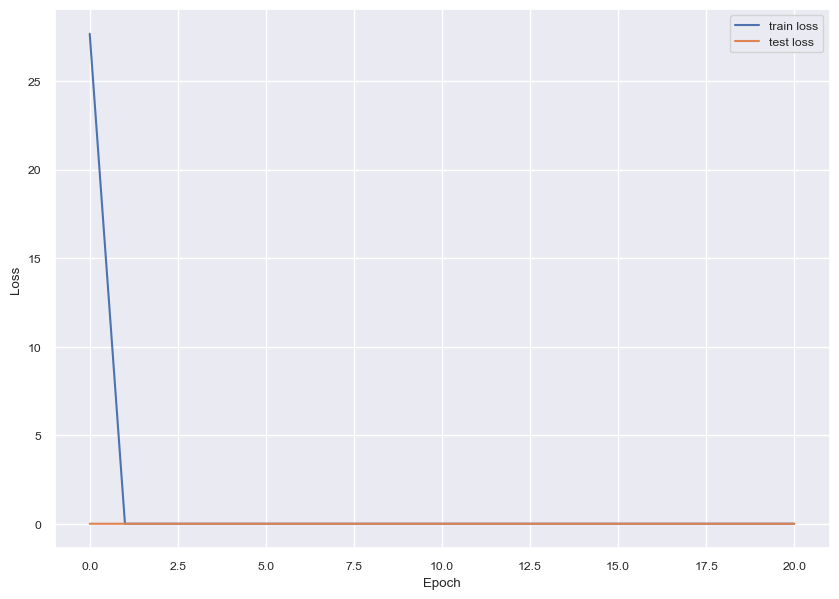

In [43]:
# loss 체크
import matplotlib.pyplot as plt

epochs_run = len(history.history['loss'])

plt.figure(figsize=(10,7))
plt.plot(range(epochs_run), history.history['loss'], label='train loss')
plt.plot(range(epochs_run), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.0022 - mae: 0.0304


[0.002045482862740755, 0.02987530827522278]

In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287
